In [1]:
import pandas as pd
import re

import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [2]:
data_set = pd.read_csv('daily_sobh_news.csv')
data_set.head()

,Title,Topic,Link
0,شاهد خاقان عباسي جو نالو اي سي ايل مان ڪڍڻ جو حڪم,عدالتون,https://dailysobh.com/archives/108793
1,جيڪو ٿئي پيو سو تڪليف ڏيندڙ آهي، پنجاب اسان جي...,عدالتون,https://dailysobh.com/archives/79976
2,سنڌ ثقافتي ورثي جو تحفظ ناهي ڪري سگهيو، مڪلي ۽...,عدالتون,https://dailysobh.com/archives/79960
3,سپريم ڪورٽ پاران پوليس اهلڪار کي بحال ڪرڻ وارو...,عدالتون,https://dailysobh.com/archives/79898
4,بينظير ڀٽو جي ورسي تي سنڌ حڪومت پاران اڄ ع...,عدالتون,https://dailysobh.com/archives/79895


In [3]:
data_set.dropna()

,Title,Topic,Link
0,شاهد خاقان عباسي جو نالو اي سي ايل مان ڪڍڻ جو حڪم,عدالتون,https://dailysobh.com/archives/108793
1,جيڪو ٿئي پيو سو تڪليف ڏيندڙ آهي، پنجاب اسان جي...,عدالتون,https://dailysobh.com/archives/79976
2,سنڌ ثقافتي ورثي جو تحفظ ناهي ڪري سگهيو، مڪلي ۽...,عدالتون,https://dailysobh.com/archives/79960
3,سپريم ڪورٽ پاران پوليس اهلڪار کي بحال ڪرڻ وارو...,عدالتون,https://dailysobh.com/archives/79898
4,بينظير ڀٽو جي ورسي تي سنڌ حڪومت پاران اڄ ع...,عدالتون,https://dailysobh.com/archives/79895
...,...,...,...
8571,پُر اعتماد انسان زندگي ۾ ڪجهه به حاصل ڪري سگهي...,شوبز,https://dailysobh.com/archives/50330
8572,گلوڪار فرحان سعيد ۽ اداڪاره عروه حسين راهون جد...,شوبز,https://dailysobh.com/archives/50202
8573,مسڪرائڻ سان ڪنهن به ڏک کي لڪائي سگهجي ٿو: صنم ...,شوبز,https://dailysobh.com/archives/50170
8574,شوبز جي دنيا ۾ ڪيترن ئي سالن تائين هراسان ڪيو...,شوبز,https://dailysobh.com/archives/50148


In [4]:
data_set.shape

(8576, 3)

In [5]:
print(data_set['Title'].isna().sum())


0


In [35]:
data_set['Title'] = data_set['Title'].fillna('')
data_set['Topic'] = data_set['Topic'].fillna('')


In [6]:
import requests

github_file_url = "https://raw.githubusercontent.com/AliNawazUoB/sindhi-TPTS/main/Sindhi%20language%20high%20frequency%20522%20stop-words.txt"

response = requests.get(github_file_url)

if response.status_code == 200:
    content = response.text
    stop_words = content.split(" ")
    print(stop_words)
else:
    print(f"Failed to fetch file from GitHub. Status code: {response.status_code}")


['اهو', 'ته', '،', 'ٿي', 'اچو،', 'جي', 'کي', 'ٻڌاءِ،', 'آهي', 'وڃڻ', 'شو', 'تون', 'ٿيو', 'جو', 'مون', 'ضرور', 'تنهنجي', 'ڳولهيو', 'کوليو،', 'به', 'توهان', 'اسان', 'پر', 'هئين،', 'ڪنهن', 'ڪڏھن', 'ٿو', 'آهي،', 'چڪو', '۽', 'ان', '۾', 'ڇو', 'ويا،', 'ڪرڻ', 'هوندو،', 'کولڻ،', 'نه', 'انهن', 'هلون', 'سگهي', 'کولڻ', 'مان', 'آهن', 'اهي', 'ڪري', 'کان', 'اچو', 'ڇا', 'ڪيئن', 'ڏيئو', 'گهرجي،', 'پوءِ', 'ويو', 'چيو', 'هڪ', 'لڳي', 'ناهي', 'پاسي', 'رکڻ', 'ٻئي', 'ڏنو،', 'پڇڻ', 'طريقا', 'هوندو', 'سان', 'هن', 'تمام', 'بابت', 'هي', 'هئي', 'ائين', 'منهنجو', 'ذريعي', 'ڇاڪاڻ', 'چئجي', 'ٿا', 'سڀ', 'جڏهن', 'ڪو', 'ٿيڻ', 'جيستائين،', 'ڪيس', 'بنا', 'ويندو', 'تي', 'هليا', 'هو', 'سندس', 'باوجود', 'آيا', 'لاءِ', 'رهيو', 'هر', 'هيٺ', 'اڪثر', 'هو،', 'ورتو،', 'وڌيڪ', 'وچ', 'ڏنو', 'واچ', 'ڏي', 'ڪيو', 'هاڻي', 'بدران', 'ٿورڙو', 'سوچيو،', 'دلچسپيون', 'شيون', 'حقيقتون', 'گهربل', 'مسئلا', 'خبر', 'گڏجي', 'هاءِ', 'سٺو', 'تنهنجو', 'دوران', 'اور', 'هيس', 'رهيا', 'بنجي', 'هلي', 'ورتو', 'ها', 'مليا', 'جا', 'عنوان', 'بعد', 'هوندي', '

In [8]:
data_set['Title'] = data_set['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [9]:
print(data_set['Title'])

0                            شاهد خاقان عباسي ايل ڪڍڻ حڪم
1       ٿئي تڪليف ڏيندڙ پنجاب اختيار ن دائري آهي:هاءِ ...
2       سنڌ ثقافتي ورثي تحفظ سگهيو، مڪلي موھن دڙي تھ ر...
3                 سپريم ڪورٽ پوليس اهلڪار بحال فيصلو معطل
4                 بينظير ڀٽو ورسي سنڌ حڪومت اڄ موڪل اعلان
                              ...                        
8571               پُر اعتماد انسان زندگي ٿو: شهريار منور
8572    گلوڪار فرحان سعيد اداڪاره عروه حسين راهون جدا ...
8573                 مسڪرائڻ ڏک لڪائي سگهجي ٿو: صنم ماروي
8574    شوبز دنيا ڪيترن سالن هراسان ويو: عائشه عمر انڪشاف
8575    علي ظفر عروج فاطمه سنڌي گيت ” الي ماروئڙا“ تيا...
Name: Title, Length: 8576, dtype: object


In [10]:
# removing special characters
import re

pattern = r'[!@#$%^&*(){};:,.<>\"|+=~`-]‘’،؟'
data_set['Title'] = data_set['Title'].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else '')

In [11]:
print(data_set['Title'])

0                            شاهد خاقان عباسي ايل ڪڍڻ حڪم
1       ٿئي تڪليف ڏيندڙ پنجاب اختيار ن دائري آهي:هاءِ ...
2       سنڌ ثقافتي ورثي تحفظ سگهيو، مڪلي موھن دڙي تھ ر...
3                 سپريم ڪورٽ پوليس اهلڪار بحال فيصلو معطل
4                 بينظير ڀٽو ورسي سنڌ حڪومت اڄ موڪل اعلان
                              ...                        
8571               پُر اعتماد انسان زندگي ٿو: شهريار منور
8572    گلوڪار فرحان سعيد اداڪاره عروه حسين راهون جدا ...
8573                 مسڪرائڻ ڏک لڪائي سگهجي ٿو: صنم ماروي
8574    شوبز دنيا ڪيترن سالن هراسان ويو: عائشه عمر انڪشاف
8575    علي ظفر عروج فاطمه سنڌي گيت ” الي ماروئڙا“ تيا...
Name: Title, Length: 8576, dtype: object


In [12]:
type_of_news = data_set['Topic'].unique()
for i in range(len(type_of_news)):
    print(type_of_news[i])

عدالتون
پاڪستان
دنيا
سنڌ
رانديون
شوبز


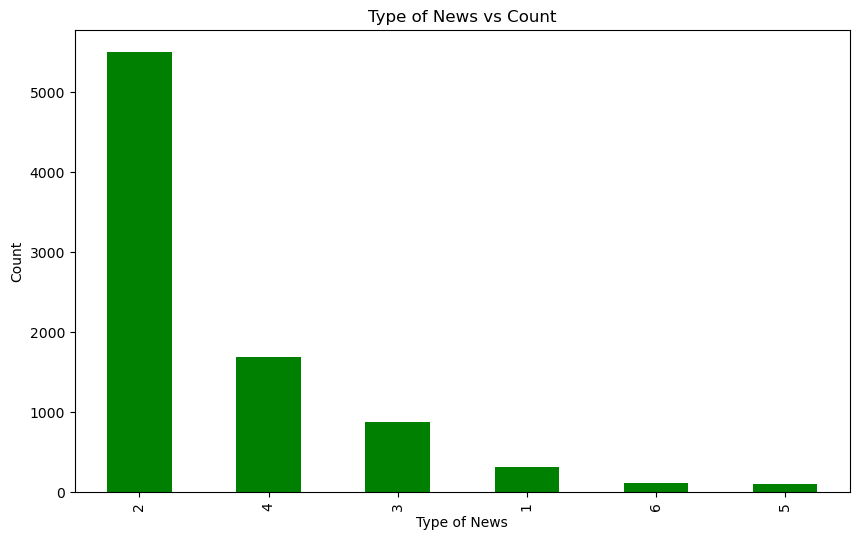

In [13]:
# bar graph of type of media
import matplotlib.pyplot as plt

type_of_news_mapping = {'عدالتون': 1, 'پاڪستان': 2, 'دنيا': 3, 'سنڌ': 4, 'رانديون': 5, 'شوبز': 6}
type_of_news_counts = data_set['Topic'].map(type_of_news_mapping).value_counts()

plt.figure(figsize=(10, 6))
type_of_news_counts.plot(kind='bar', color='green')
plt.xlabel('Type of News')
plt.ylabel('Count')
plt.title('Type of News vs Count')
plt.show()

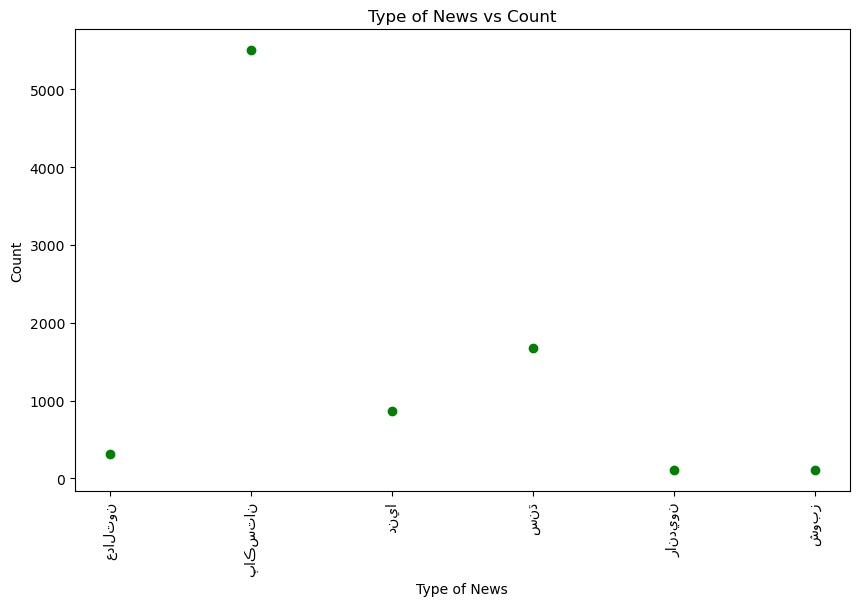

In [14]:
# scatter plot of type of media
import matplotlib.pyplot as plt

type_of_news_mapping = {'عدالتون': 1, 'پاڪستان': 2, 'دنيا': 3, 'سنڌ': 4, 'رانديون': 5, 'شوبز': 6}
type_of_news_counts = data_set['Topic'].map(type_of_news_mapping).value_counts()

plt.figure(figsize=(10, 6))
plt.scatter(type_of_news_counts.index, type_of_news_counts.values, color='green')
plt.xlabel('Type of News')
plt.ylabel('Count')
plt.title('Type of News vs Count')
plt.xticks(list(type_of_news_mapping.values()), list(type_of_news_mapping.keys()), rotation='vertical')
plt.show()

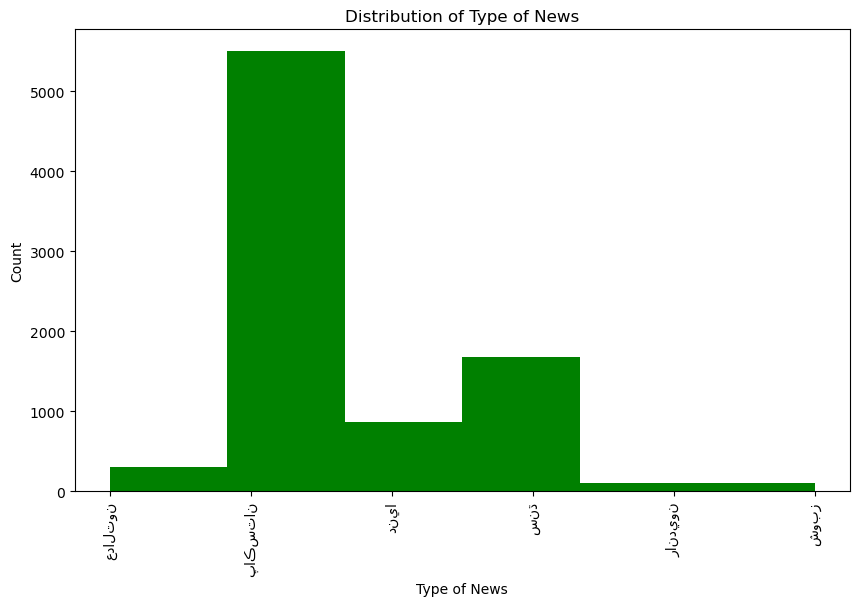

In [18]:
# histogram graph of type of media
import matplotlib.pyplot as plt

type_of_news_mapping = {'عدالتون': 1, 'پاڪستان': 2, 'دنيا': 3, 'سنڌ': 4, 'رانديون': 5, 'شوبز': 6}
type_of_news_counts = data_set['Topic'].map(type_of_news_mapping)

plt.figure(figsize=(10, 6))
plt.hist(type_of_news_counts, bins=len(type_of_news_mapping), color='green')
plt.xlabel('Type of News')
plt.ylabel('Count')
plt.title('Distribution of Type of News')
plt.xticks(list(type_of_news_mapping.values()), list(type_of_news_mapping.keys()), rotation='vertical')
plt.show()

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(data_set['Title'])

y = data_set['Topic']
print(count_matrix)

  (0, 4199)	1
  (0, 2786)	1
  (0, 4571)	1
  (0, 1384)	1
  (0, 9785)	1
  (0, 2764)	1
  (1, 8204)	1
  (1, 2316)	1
  (1, 8990)	1
  (1, 7949)	1
  (1, 786)	1
  (1, 2927)	1
  (1, 668)	1
  (1, 6604)	1
  (1, 9614)	1
  (2, 9614)	1
  (2, 3896)	1
  (2, 2329)	1
  (2, 6960)	1
  (2, 2146)	1
  (2, 4167)	1
  (2, 6223)	1
  (2, 6074)	1
  (2, 3084)	1
  (2, 2320)	1
  :	:
  (8573, 8225)	1
  (8573, 9021)	1
  (8573, 5346)	1
  (8573, 5423)	1
  (8573, 4445)	1
  (8573, 5698)	1
  (8574, 3635)	1
  (8574, 4674)	1
  (8574, 4539)	1
  (8574, 6661)	1
  (8574, 1259)	1
  (8574, 7135)	1
  (8574, 3034)	1
  (8574, 9675)	1
  (8574, 4319)	1
  (8575, 4661)	1
  (8575, 2286)	1
  (8575, 4625)	1
  (8575, 4530)	1
  (8575, 3901)	1
  (8575, 4808)	1
  (8575, 10020)	1
  (8575, 1107)	1
  (8575, 5421)	1
  (8575, 7851)	1


In [22]:
#Classification LAgorithm 1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(count_matrix, y, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [23]:
# classification report of logistic model
y_pred = logistic_regression.predict(x_test)
logistic_regression_report = classification_report(y_test, y_pred, zero_division=1)
print(logistic_regression_report)

              precision    recall  f1-score   support

        دنيا       0.77      0.65      0.71       170
     رانديون       0.56      0.23      0.32        22
         سنڌ       0.72      0.65      0.68       327
        شوبز       1.00      0.10      0.18        30
     عدالتون       0.60      0.43      0.50        72
     پاڪستان       0.81      0.90      0.85      1095

    accuracy                           0.78      1716
   macro avg       0.74      0.49      0.54      1716
weighted avg       0.78      0.78      0.77      1716



In [25]:
# desicion tree
from sklearn.tree import DecisionTreeClassifier

# Split the data
x_train, x_test, y_train, y_test = train_test_split(count_matrix, y, test_size=0.2, random_state=42)

# Create and train the model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
# calssification report of decision tree
y_pred_dt = decision_tree.predict(x_test)

# Evaluate and print the classification report
decision_tree_report = classification_report(y_test, y_pred_dt, zero_division=1)
print(decision_tree_report)


              precision    recall  f1-score   support

        دنيا       0.69      0.65      0.67       170
     رانديون       0.40      0.36      0.38        22
         سنڌ       0.63      0.59      0.61       327
        شوبز       0.50      0.27      0.35        30
     عدالتون       0.51      0.33      0.40        72
     پاڪستان       0.80      0.85      0.82      1095

    accuracy                           0.74      1716
   macro avg       0.59      0.51      0.54      1716
weighted avg       0.73      0.74      0.73      1716



In [27]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Split the data
x_train, x_test, y_train, y_test = train_test_split(count_matrix, y, test_size=0.2, random_state=42)

# Create and train the model
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)


RandomForestClassifier()

In [28]:
# classification report of random forest
y_pred_rf = random_forest.predict(x_test)

# Evaluate and print the classification report
random_forest_report = classification_report(y_test, y_pred_rf, zero_division=1)
print(random_forest_report)

              precision    recall  f1-score   support

        دنيا       0.84      0.56      0.67       170
     رانديون       0.71      0.23      0.34        22
         سنڌ       0.75      0.60      0.66       327
        شوبز       1.00      0.03      0.06        30
     عدالتون       0.68      0.26      0.38        72
     پاڪستان       0.78      0.93      0.85      1095

    accuracy                           0.78      1716
   macro avg       0.79      0.43      0.50      1716
weighted avg       0.78      0.78      0.75      1716



In [29]:
#support vector machine svm
from sklearn.svm import SVC

# Split the data
x_train, x_test, y_train, y_test = train_test_split(count_matrix, y, test_size=0.2, random_state=42)

# Create and train the model
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

SVC()

In [30]:
# support vector machines classification report
y_pred_svm = svm_classifier.predict(x_test)

# Evaluate and print the classification report
svm_report = classification_report(y_test, y_pred_svm, zero_division=1)
print(svm_report)


              precision    recall  f1-score   support

        دنيا       0.87      0.52      0.65       170
     رانديون       1.00      0.05      0.09        22
         سنڌ       0.77      0.60      0.67       327
        شوبز       1.00      0.00      0.00        30
     عدالتون       0.77      0.28      0.41        72
     پاڪستان       0.77      0.94      0.85      1095

    accuracy                           0.78      1716
   macro avg       0.86      0.40      0.44      1716
weighted avg       0.79      0.78      0.75      1716

